<a href="https://colab.research.google.com/github/JihoonPark99/NLP_study/blob/main/_8_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D(Recurrent_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [ ]:
import numpy as np

In [ ]:
inputs.shape

(100, 32)

In [ ]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
print('inputs shape : ', inputs.shape)

state_t = np.zeros((output_features, )) ##상태값 초기화
print('state_t shape : ', state_t.shape)

W = np.random.random((output_features, input_features)) ##input이랑 만나는 가중치치
print('W shape : ', W.shape)
U = np.random.random((output_features, output_features)) ##전 hidden에서 현재 hidden이랑 만나는 가중치
print('U shape : ', U.shape)
b = np.random.random((output_features, ))

succesive_outputs = []

for input_t in inputs : ##input_t가 32개씩 100번 시행됨.
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) 
  succesive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(succesive_outputs, axis=0)
print(final_output_sequence[:2])
print('len of final_output_sequence :', final_output_sequence.shape)

inputs shape :  (100, 32)
state_t shape :  (64,)
W shape :  (64, 32)
U shape :  (64, 64)
[[0.99999854 0.99999918 0.99998669 0.99999932 0.99997073 0.99999935
  0.9999991  0.99999526 0.99999525 0.99998252 0.99997144 0.99992806
  0.99999509 0.99999501 0.99999447 0.99997084 0.99998753 0.99997362
  0.99999585 0.99999755 0.99999574 0.99993057 0.9999941  0.9999986
  0.99999892 0.99999263 0.99998636 0.99997733 0.99992518 0.99999541
  0.99999658 0.99998766 0.99997841 0.99999105 0.99999703 0.9998786
  0.99992776 0.99999923 0.99999438 0.99999965 0.99999669 0.99984525
  0.99999115 0.99999583 0.99998751 0.99999694 0.99996888 0.99956347
  0.99996032 0.99999925 0.99997984 0.99997869 0.99999776 0.99999323
  0.99999397 0.99998183 0.99999935 0.99999889 0.9999811  0.99999817
  0.99966253 0.99999505 0.99999501 0.99999409]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.  

In [ ]:
final_output_sequence[:10]

array([[0.99999992, 0.99999955, 0.99999984, 0.99999909, 0.99999858,
        0.99999999, 1.        , 0.99999959, 0.9999997 , 0.99999969,
        0.99999919, 0.99999995, 0.99999991, 0.99999816, 0.99999997,
        0.99999985, 0.99999973, 0.99999998, 0.99999992, 0.99999996,
        0.99999963, 0.99999985, 0.99999895, 0.99999998, 0.99999997,
        0.99999991, 0.9999995 , 0.99999887, 0.99999986, 0.9999998 ,
        0.99999999, 0.99999989, 0.99999999, 1.        , 0.99999996,
        0.99999944, 0.99999908, 0.99999854, 0.99999709, 0.99999924,
        0.99999988, 0.99999994, 0.99999995, 0.99999996, 0.99999566,
        0.9999998 , 0.9999999 , 0.99999987, 0.99999999, 0.99998754,
        0.99999996, 0.99999989, 0.99999905, 0.99999971, 0.99999995,
        0.99999999, 0.99999895, 0.99999999, 1.        , 0.99999923,
        0.99999811, 0.99999935, 0.99999995, 0.99999706],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1. 

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32)) #만개 임베딩 주고, 출력32
##input dimension : 10000
##output dimension : 32
##embedding 파라미터 수 : 10000*32 = 320000
model.add(SimpleRNN(32))
##model.add(SimpleRNN(16)) #return_sequences를 해주지 않아서
##층을 더 이상 쌓지 못함
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##return_sequences추가
model = Sequential()
model.add(Embedding(10000, 32)) #만개 임베딩 주고, 출력32
model.add(SimpleRNN(32, return_sequences=True)) ##값을 sequence로 넘겨줄거냐 말거냐
#예를 들어 model.add(SimpleRNN(16)) ##쌓는게 가능함함
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [ ]:
##층 쌓기
model = Sequential()
model.add(Embedding(10000, 32)) #input:10000, output32
model.add(SimpleRNN(32, return_sequences=True)) #input:32, output:32
model.add(SimpleRNN(32, return_sequences=True)) #input:32, output:32
model.add(SimpleRNN(32, return_sequences=True)) #input:32, output:32
model.add(SimpleRNN(32, return_sequences=True)) #input:32, output:32
model.add(SimpleRNN(32, return_sequences=True)) ##값을 sequence로 넘겨줄거냐 말거냐
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_20 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_22 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_23 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_24 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
Total params: 330,400
Trainable params: 330,400
Non-t

## IMDB 데이터 적용

### 데이터 로드

- IMDB 데이터 셋
영화 리뷰에 대한 데이터 50000개로 이루어져 있습니다. 이 중 25,000개의 훈련데이터와 25,000개의 테스트데이터로 나눠지며 각각 50%씩 긍정 리뷰와 부정 리뷰가 있습니다. 이 데이터는 이미 전처리가 되어 있어서 각 리뷰가 숫자로 변환되어있습니다. 리뷰를 숫자로 바꾸는 원리는 사전에 있는 단어와 숫자를 매핑시켜서 단어대신 숫자로 표현한 것입니다. 그럼 데이터를 불러와보겠습니다.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(input_train[0])
print(y_train[0])
## 부정은 0, 긍정은 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
# 훈련데이터에서 가장 자주 사용하는 단어 1만개만 사용하겠다는 의미
# 사용 빈도수가 10000등 안에 들지 못하는 데이터는 training을 시키지 않음
# 이런 과정을 통해 적절한 크기의 벡터 데이터를 얻을 수 있음
print(len(input_train))
print(len(input_test))
print(input_train[0])

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape) #패딩해서 500개 더 생김
print(input_test.shape) #패딩해서 500개 더 생김

25000
25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000, 500)
(25000, 500)


In [ ]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 72s 437ms/step - loss: 0.6121 - acc: 0.6533 - val_loss: 0.4253 - val_acc: 0.8228
Epoch 2/10
157/157 [==============================] - 71s 452ms/step - loss: 0.3831 - acc: 0.8425 - val_loss: 0.3772 - val_acc: 0.8452
Epoch 3/10
157/157 [==============================] - 70s 447ms/step - loss: 0.2730 - acc: 0.8906 - val_loss: 0.4237 - val_acc: 0.8172
Epoch 4/10
157/157 [==============================] - 70s 449ms/step - loss: 0.2254 - acc: 0.9160 - val_loss: 0.3650 - val_acc: 0.8562
Epoch 5/10
157/157 [==============================] - 69s 441ms/step - loss: 0.1551 - acc: 0.9434 - val_loss: 0.4332 - val_acc: 0.8326
Epoch 6/10
157/157 [==============================] - 69s 437ms/step - loss: 0.1117 - acc: 0.9616 - val_loss: 0.4485 - val_acc: 0.8358
Epoch 7/10
157/157 [==============================] - 70s 445ms/step - loss: 0.0774 - acc: 0.9758 - val_loss: 0.4882 - val_acc: 0.8252
Epoch 8/10
157/157 [==============================] - 7

### 시각화

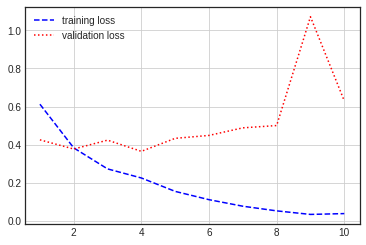

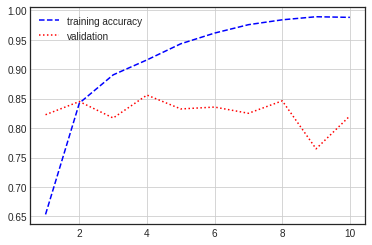

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation')
plt.grid()
plt.legend()

In [ ]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 29s 36ms/step - loss: 0.6691 - acc: 0.8203


[0.6690838932991028, 0.8203200101852417]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape) #패딩해서 500개 더 생김
print(pad_x_test.shape) #패딩해서 500개 더 생김

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [ ]:
##RNN대신에 LSTM으로 바꾸면 어떤 차이가 있을까
## 모델 구성
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 23ms/step - loss: 0.5232 - acc: 0.7405 - val_loss: 0.4542 - val_acc: 0.7992
Epoch 2/10
157/157 [==============================] - 3s 19ms/step - loss: 0.3129 - acc: 0.8766 - val_loss: 0.3696 - val_acc: 0.8564
Epoch 3/10
157/157 [==============================] - 3s 20ms/step - loss: 0.2381 - acc: 0.9117 - val_loss: 0.3677 - val_acc: 0.8446
Epoch 4/10
157/157 [==============================] - 3s 22ms/step - loss: 0.2040 - acc: 0.9243 - val_loss: 0.3023 - val_acc: 0.8692
Epoch 5/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1813 - acc: 0.9352 - val_loss: 0.3458 - val_acc: 0.8646
Epoch 6/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1597 - acc: 0.9426 - val_loss: 0.2977 - val_acc: 0.8888
Epoch 7/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1456 - acc: 0.9500 - val_loss: 0.3336 - val_acc: 0.8784
Epoch 8/10
157/157 [==============================] - 3s 20ms/step -

### 시각화

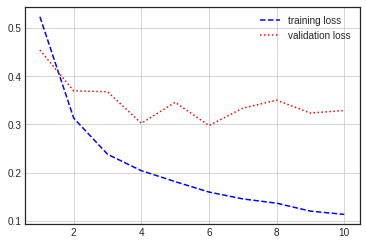

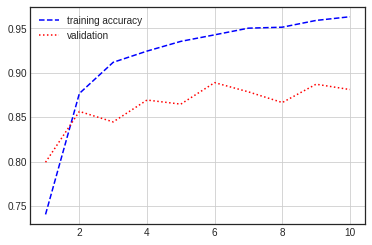

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation')
plt.grid()
plt.legend()

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 7s 8ms/step - loss: 0.4527 - acc: 0.8628


[0.45266687870025635, 0.8628000020980835]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
num_words=10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982,)
(2246,)
(8982,)
(2246,)


### 데이터 전처리 및 확인

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 300

In [ ]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)
print(len(pad_x_train[0]))

300


In [ ]:
pad_x_train[5]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [ ]:
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2560000   
                                                                 
 gru_2 (GRU)                 (None, None, 256)         394752    
                                                                 
 gru_3 (GRU)                 (None, 128)               148224    
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [ ]:
history = model.fit(pad_x_train, y_train,
          batch_size=32,
          epochs=20, 
          validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 16s 36ms/step - loss: 2.0142 - acc: 0.4732 - val_loss: 1.7028 - val_acc: 0.5570
Epoch 2/20
225/225 [==============================] - 7s 33ms/step - loss: 1.5268 - acc: 0.6049 - val_loss: 1.4588 - val_acc: 0.6244
Epoch 3/20
225/225 [==============================] - 7s 32ms/step - loss: 1.1762 - acc: 0.6951 - val_loss: 1.3600 - val_acc: 0.6544
Epoch 4/20
225/225 [==============================] - 7s 33ms/step - loss: 0.8842 - acc: 0.7673 - val_loss: 1.2706 - val_acc: 0.6928
Epoch 5/20
225/225 [==============================] - 7s 33ms/step - loss: 0.6664 - acc: 0.8251 - val_loss: 1.2973 - val_acc: 0.7051
Epoch 6/20
225/225 [==============================] - 7s 33ms/step - loss: 0.5103 - acc: 0.8722 - val_loss: 1.3269 - val_acc: 0.7023
Epoch 7/20
225/225 [==============================] - 7s 33ms/step - loss: 0.4019 - acc: 0.8973 - val_loss: 1.4666 - val_acc: 0.6978
Epoch 8/20
225/225 [==============================] - 8s 36ms/step -

### 시각화

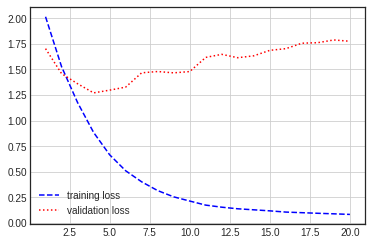

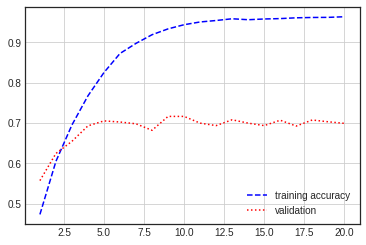

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation')
plt.grid()
plt.legend()

### 모델 평가


In [ ]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 14ms/step - loss: 1.9066 - acc: 0.6848


[1.906638503074646, 0.6847729086875916]

Reuters뉴스 데이터 
- GRU : 68.12%

IMDB데이터
- RNN : 82%
- LSTM : 86.28%